In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

%matplotlib notebook

# Local Functions

In [2]:
def TS_Describe_stats(data, valType = 'Flow_CFS'):
    mindate = data['datetime'].min()
    maxdate = data['datetime'].max()
    daterez = data['datetime'][1]-data['datetime'][0]
    minval = data[valType].min()
    maxval = data[valType].max()
    aveval = data[valType].mean()
    medval = data[valType].median()
    print("Date range = {} to {}".format(mindate, maxdate))
    print("Timestep is {}".format(daterez))
    print("Value range is {} to {}".format(minval, maxval))   
    print("Average value is {}".format(aveval))
    print("Median value is {}".format(medval)) 
    print('\n')

# Pull in and format OBS data 

### Puu Kukui Rainfall USGS data 

(Need to add in the code to pull down the Data From USGS, eventually (for now it requires some PIP installs I dont want to do))

<IPython.core.display.Javascript object>


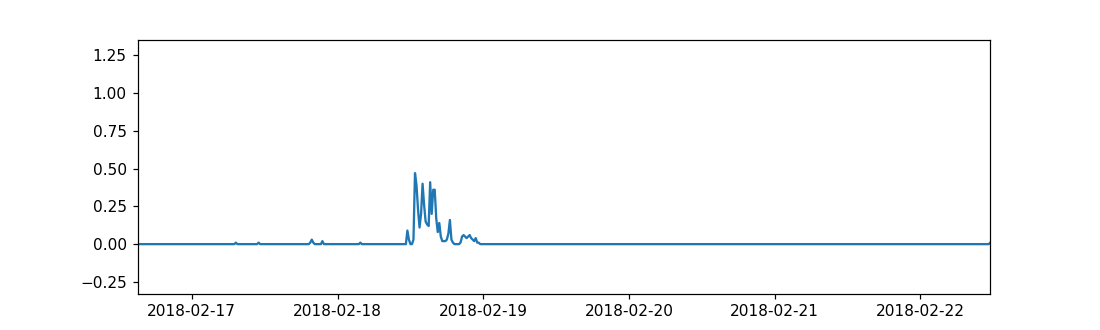

Date range = 2007-10-01 00:00:00 to 2022-10-01 05:45:00
Timestep is 0 days 00:15:00
Value range is 0.0 to 1.25
Average value is 0.006913848312043485
Median value is 0.0




In [4]:
# Import data 
PuuKukuiRain = pd.read_csv(os.path.join("..", "..", "Data/USGS_data", 'PuuKukuiRain_Oct2007_Oct2022.csv'))
PuuKukuiRain['datetime'] = pd.to_datetime(PuuKukuiRain['datetime'], errors='coerce')
# Another reasone to dislike USGS, what is whith this timezone crap, remove the timezone stamp on here...
PuuKukuiRain['datetime'] = PuuKukuiRain['datetime'].dt.tz_localize(None)

# Clean data 
PuuKukuiRain = PuuKukuiRain[['datetime', '00045']]
PuuKukuiRain.rename(columns={'00045': 'rain_in'}, inplace=True)
# Plot data 
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(PuuKukuiRain['datetime'],PuuKukuiRain['rain_in'], '-',label='Puukukui Rainfall Inches')

TS_Describe_stats(PuuKukuiRain, 'rain_in')

## Stream Data 

<IPython.core.display.Javascript object>


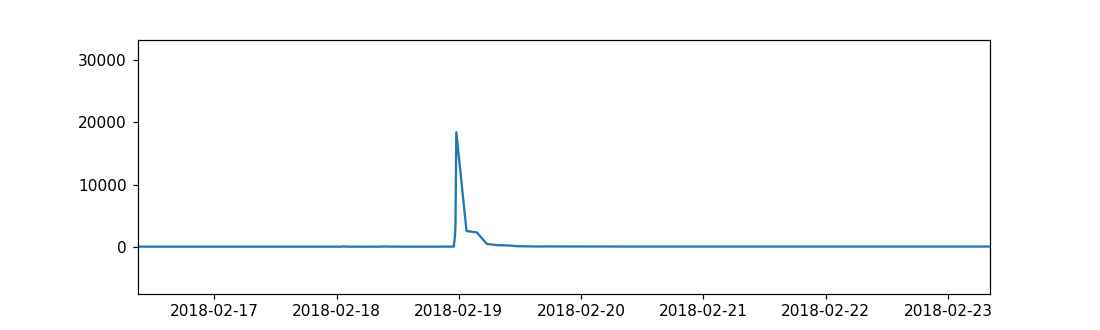

Date range = 1992-01-01 00:00:00 to 2022-01-31 00:00:00
Timestep is 0 days 00:30:00
Value range is 14.0 to 18400.0
Average value is 72.15348558658555
Median value is 47.2




In [3]:
# Import Wailuku data 
WaiheheFlow = pd.read_csv(os.path.join("..", "..", "Data/USGS_data", 'Waihehe_16614000_CFS.csv'))
WaiheheFlow['value_date'] = pd.to_datetime(WaiheheFlow['value_date'], errors='coerce')
# Clean data 
WaiheheFlow = WaiheheFlow[['value_date', 'value']]
WaiheheFlow.rename(columns={'value': 'Flow_CFS', 'value_date':'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(WaiheheFlow['datetime'],WaiheheFlow['Flow_CFS'], '-',label='Flow_CFS')

TS_Describe_stats(WaiheheFlow)

<IPython.core.display.Javascript object>


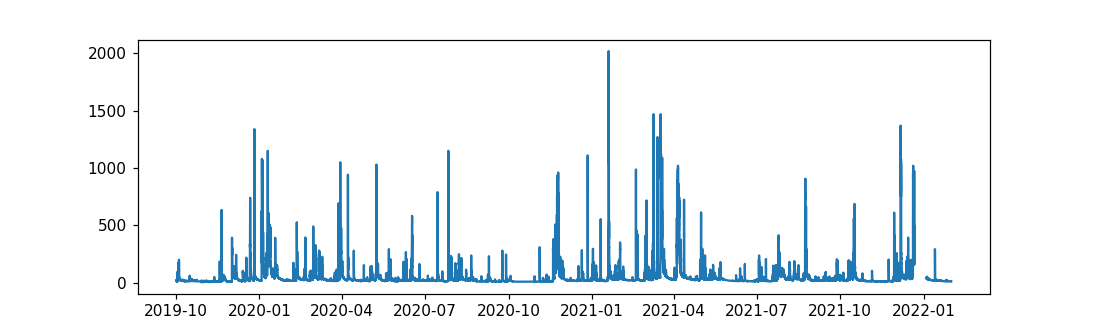

Date range = 2019-10-01 10:00:00 to 2022-01-31 00:00:00
Timestep is 0 days 00:05:00
Value range is 3.94 to 2020.0
Average value is 43.09734299649093
Median value is 21.5




In [5]:
# Import Wailuku Iao data 
Wailuku_IaoFlow = pd.read_csv(os.path.join("..", "..", "Data/USGS_data", 'Wailuku_Iao_16605500_CFS.csv'))
Wailuku_IaoFlow['value_date'] = pd.to_datetime(Wailuku_IaoFlow['value_date'], errors='coerce')
# Clean data 
Wailuku_IaoFlow = Wailuku_IaoFlow[['value_date', 'value']]
Wailuku_IaoFlow.rename(columns={'value': 'Flow_CFS', 'value_date':'datetime'}, inplace=True)
# Plot data 
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(Wailuku_IaoFlow['datetime'],Wailuku_IaoFlow['Flow_CFS'], '-',label='Flow_CFS')

TS_Describe_stats(Wailuku_IaoFlow)

<IPython.core.display.Javascript object>


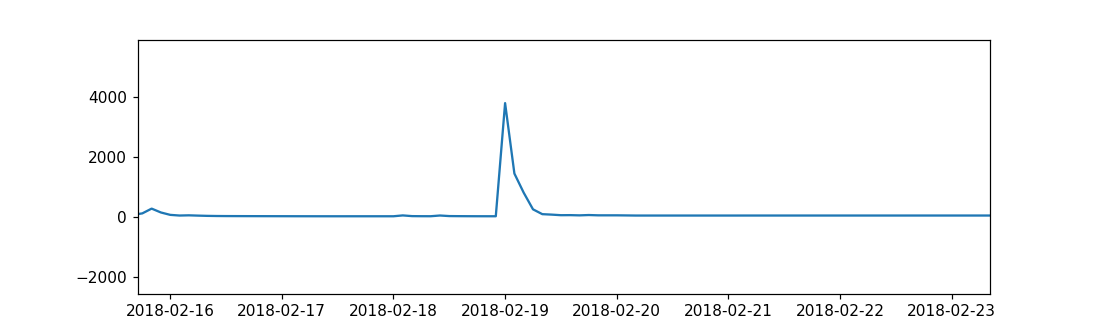

Date range = 1994-10-01 10:30:00 to 2022-01-31 00:00:00
Timestep is 0 days 00:30:00
Value range is 5.33 to 4770.0
Average value is 68.80288140493704
Median value is 31.0




In [6]:
# Import Wailuku Kepaniwai data 
Wailuku_KepaniwaiFlow = pd.read_csv(os.path.join("..", "..", "Data/USGS_data", 'Wailuku_Kepaniwai_16604500_CFS.csv'))
Wailuku_KepaniwaiFlow['value_date'] = pd.to_datetime(Wailuku_KepaniwaiFlow['value_date'], errors='coerce')
# Clean data 
Wailuku_KepaniwaiFlow = Wailuku_KepaniwaiFlow[['value_date', 'value']]
Wailuku_KepaniwaiFlow.rename(columns={'value': 'Flow_CFS', 'value_date':'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(Wailuku_KepaniwaiFlow['datetime'],Wailuku_KepaniwaiFlow['Flow_CFS'], '-',label='Flow_CFS')

TS_Describe_stats(Wailuku_KepaniwaiFlow)

## Resample all to 30 min and Merge them into one 30 min file 

Starting at 2007 to Jan 2022   to ensure continuity across all sets 


In [20]:
PuuKukuiRain_set = PuuKukuiRain.set_index('datetime')
PuuKukuiRain_30min = PuuKukuiRain_set.resample('30T').sum()

WaiheheFlow_set = WaiheheFlow.set_index('datetime')
WaiheheFlow_30min = WaiheheFlow_set.resample('30T').mean()

Wailuku_IaoFlow_set = Wailuku_IaoFlow.set_index('datetime')
Wailuku_IaoFlow_30min = Wailuku_IaoFlow_set.resample('30T').mean()

Wailuku_KepaniwaiFlow_set = Wailuku_KepaniwaiFlow.set_index('datetime')
Wailuku_KepaniwaiFlow_30min = Wailuku_KepaniwaiFlow_set.resample('30T').mean()

# Merge them into one 30 min file 
PuuKukuiRain_3030 = PuuKukuiRain_30min['2007-10-02':'2022-01-30']
WaiheheFlow_3030 = WaiheheFlow_30min['2007-10-02':'2022-01-30']
Wailuku_KepaniwaiFlow_3030 = Wailuku_KepaniwaiFlow_30min['2007-10-02':'2022-01-30']

# Merge themm all togehter
m1 = PuuKukuiRain_3030.join(WaiheheFlow_3030, how='outer')
m1.rename(columns={'Flow_CFS': 'WaiheheFlow'}, inplace=True)

All_merged_30min = m1.join(Wailuku_KepaniwaiFlow_3030, how='outer')
All_merged_30min.rename(columns={'Flow_CFS': 'Wailuku_KepaniwaiFlow'}, inplace=True)

# Print to a simplified file 
All_merged_30min.to_csv(os.path.join("OBS_data_rain_Streams_2007-2021.csv"))

### Define the biggest flood days 

<IPython.core.display.Javascript object>


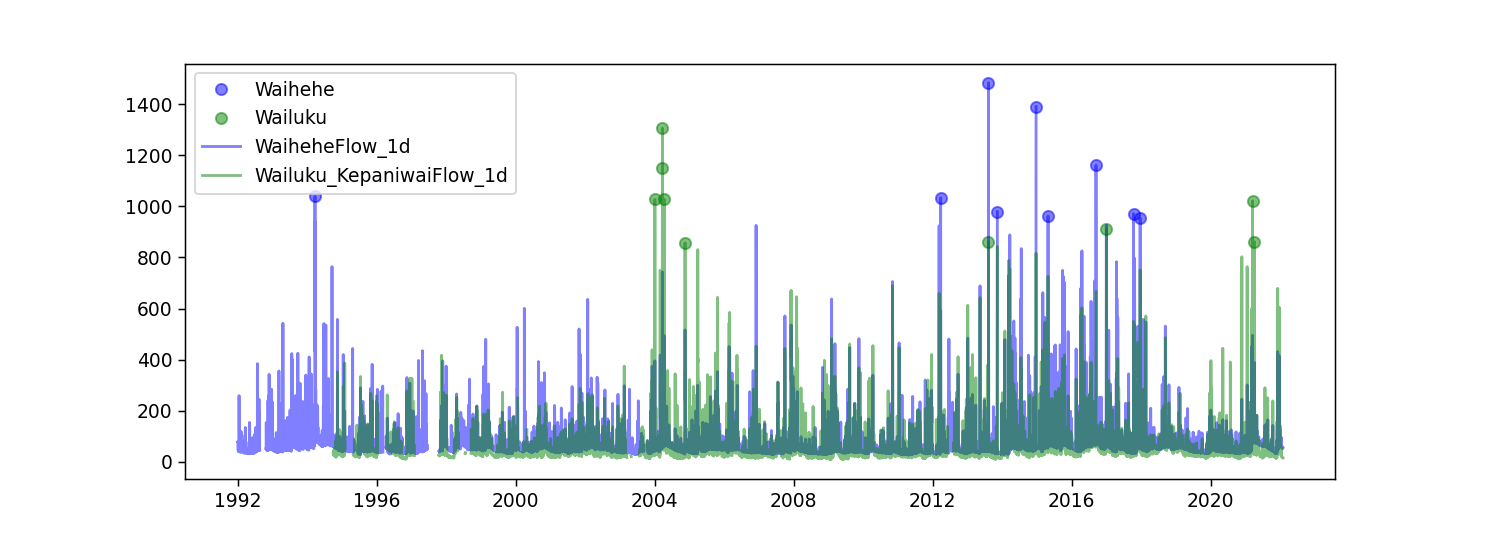

In [118]:
# Downsample Stream Data 
WaiheheFlow_1d = WaiheheFlow_set.resample('1D').mean()
Wailuku_IaoFlow_1d = Wailuku_IaoFlow_set.resample('1D').mean()
Wailuku_KepaniwaiFlow_1d = Wailuku_KepaniwaiFlow_set.resample('1D').mean()

# Find the biggest Flood potential days Wailuku River
biguns_Wailuku_KepaniwaiFlow_1d = Wailuku_KepaniwaiFlow_1d.sort_values("Flow_CFS", ascending=False)
biguns_Wailuku_KepaniwaiFlow_1d.reset_index(inplace=True)
biguns_Wailuku_KepaniwaiFlow_1d = biguns_Wailuku_KepaniwaiFlow_1d[0:9]

# Find the biggest Flood potential days Waihehe River
biguns_WaiheheFlow_1d = WaiheheFlow_1d.sort_values("Flow_CFS", ascending=False)
biguns_WaiheheFlow_1d.reset_index(inplace=True)
biguns_WaiheheFlow_1d = biguns_WaiheheFlow_1d[0:9]
biguns_WaiheheFlow_1d.to_csv(os.path.join("biguns_WaiheheFlow_1d.csv"))

# Plot 
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(biguns_WaiheheFlow_1d['datetime'],biguns_WaiheheFlow_1d['Flow_CFS'], 'o', c='b', alpha=0.5, label="Waihehe")
ax.plot(biguns_Wailuku_KepaniwaiFlow_1d['datetime'],biguns_Wailuku_KepaniwaiFlow_1d['Flow_CFS'], 'o', c='g', alpha=0.5, label="Wailuku")
ax.plot(WaiheheFlow_1d['Flow_CFS'], '-',label='WaiheheFlow_1d', c='b', alpha = 0.5)
ax.plot(Wailuku_KepaniwaiFlow_1d['Flow_CFS'], '-',label='Wailuku_KepaniwaiFlow_1d', c='g', alpha = 0.5)

plt.legend()
# Looks like big events were on 2014-12-23,   2013-11-11,   2013-08-10 (but rainfall missing)

# Import YuPhen Raindfall data 

- downloaded manually from https://doi.org/10.6084/m9.figshare.c.5779532.v1

Would be nice to use an API call to downliad then analyze all at once.

<IPython.core.display.Javascript object>


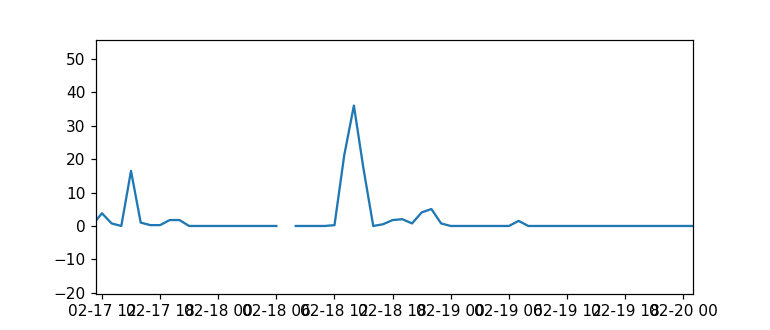

Date range = 1994-09-22 09:00:00 to 2020-12-31 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 70.358
Average value is 0.11355604797212336
Median value is 0.0




In [7]:
# Import KAHAKULOA station 
KAHAKULOARain = pd.read_csv(os.path.join("..", "..", "Data/Rainfall_data/Yufen_paper", 'KHKH1.csv'))
KAHAKULOARain['DateTime'] = pd.to_datetime(KAHAKULOARain['DateTime'], errors='coerce')

# Clean data 
KAHAKULOARain = KAHAKULOARain[['DateTime', 'RF_mm']]
KAHAKULOARain.rename(columns={'DateTime': 'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(KAHAKULOARain['datetime'],KAHAKULOARain['RF_mm'], '-',label='Rainfall Inches')

TS_Describe_stats(KAHAKULOARain, 'RF_mm')

<IPython.core.display.Javascript object>


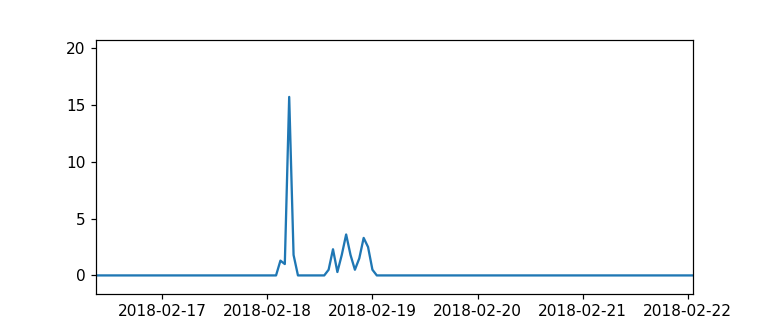

Date range = 1973-12-31 14:00:00 to 2020-12-31 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 67.1
Average value is 0.04968361931260938
Median value is 0.0




In [8]:
# Import OGG station 
OGG_Rain = pd.read_csv(os.path.join("..", "..", "Data/Rainfall_data/Yufen_paper", '911900-22516.csv'))
OGG_Rain['DateTime'] = pd.to_datetime(OGG_Rain['DateTime'], errors='coerce')

# Clean data 
OGG_Rain = OGG_Rain[['DateTime', 'RF_mm']]
OGG_Rain.rename(columns={'DateTime': 'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(OGG_Rain['datetime'],OGG_Rain['RF_mm'], '-',label='Rainfall Inches')

TS_Describe_stats(OGG_Rain, 'RF_mm')

<IPython.core.display.Javascript object>


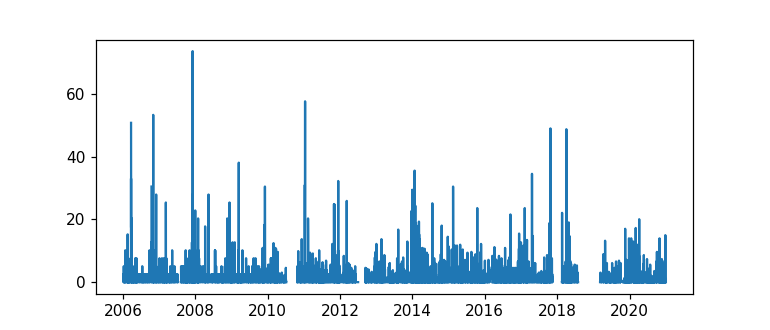

Date range = 2006-01-05 10:00:00 to 2020-12-31 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 73.66
Average value is 0.1882363034641691
Median value is 0.0




In [10]:
# Import FIELD_28 station 
FIELD_28Rain = pd.read_csv(os.path.join("..", "..", "Data/Rainfall_data/Yufen_paper", 'USC00510530.csv'))
FIELD_28Rain['DateTime'] = pd.to_datetime(FIELD_28Rain['DateTime'], errors='coerce')

# Clean data 
FIELD_28Rain = FIELD_28Rain[['DateTime', 'RF_mm']]
FIELD_28Rain.rename(columns={'DateTime': 'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(FIELD_28Rain['datetime'],FIELD_28Rain['RF_mm'], '-',label='Rainfall Inches')

TS_Describe_stats(FIELD_28Rain, 'RF_mm')

<IPython.core.display.Javascript object>


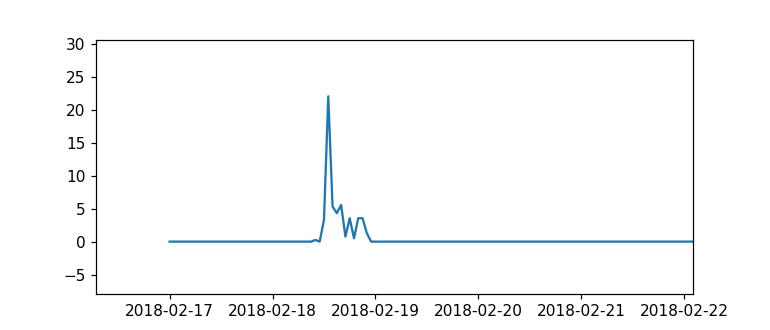

Date range = 2006-01-05 10:00:00 to 2020-12-31 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 73.66
Average value is 0.1882363034641691
Median value is 0.0




<IPython.core.display.Javascript object>


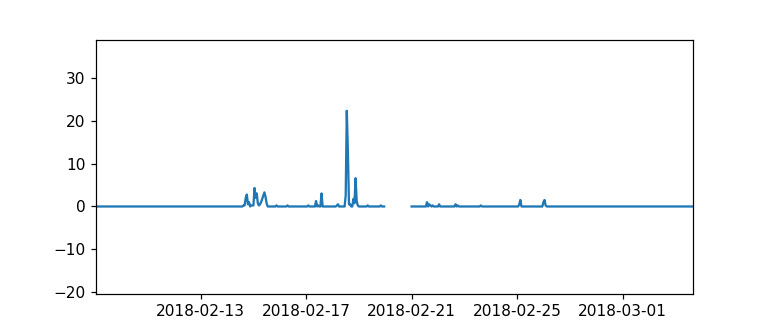

Date range = 1967-12-21 11:00:00 to 2019-05-07 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 99.06
Average value is 0.10405174419050486
Median value is 0.0




In [11]:
# Import KAHAKULOA_MAUKA station 
KAHAKULOA_MAUKARain = pd.read_csv(os.path.join("..", "..", "Data/Rainfall_data/Yufen_paper", 'USC00512453.csv'))
KAHAKULOA_MAUKARain['DateTime'] = pd.to_datetime(KAHAKULOA_MAUKARain['DateTime'], errors='coerce')

# Clean data 
KAHAKULOA_MAUKARain = KAHAKULOA_MAUKARain[['DateTime', 'RF_mm']]
KAHAKULOA_MAUKARain.rename(columns={'DateTime': 'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(KAHAKULOA_MAUKARain['datetime'],KAHAKULOA_MAUKARain['RF_mm'], '-',label='Rainfall Inches')

TS_Describe_stats(KAHAKULOA_MAUKARain, 'RF_mm')

<IPython.core.display.Javascript object>


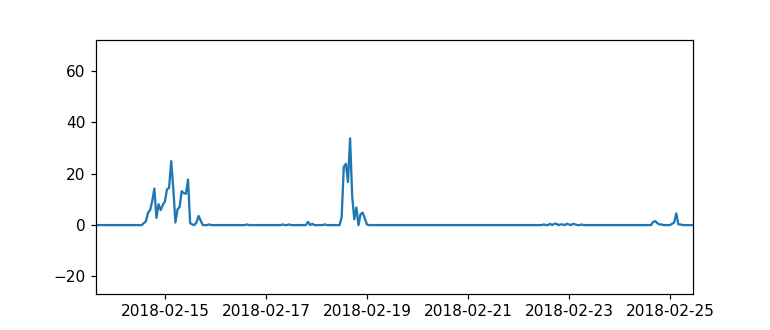

Date range = 2007-10-01 00:00:00 to 2020-12-31 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 88.646
Average value is 0.7028017270196392
Median value is 0.0




In [12]:
# Import PUU_KUKIv2 station 
PUU_KUKIv2 = pd.read_csv(os.path.join("..", "..", "Data/Rainfall_data/Yufen_paper", 'USGS_uv205327156351102.csv'))
PUU_KUKIv2['DateTime'] = pd.to_datetime(PUU_KUKIv2['DateTime'], errors='coerce')

# Clean data 
PUU_KUKIv2 = PUU_KUKIv2[['DateTime', 'RF_mm']]
PUU_KUKIv2.rename(columns={'DateTime': 'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(PUU_KUKIv2['datetime'],PUU_KUKIv2['RF_mm'], '-',label='Rainfall Inches')

TS_Describe_stats(PUU_KUKIv2, 'RF_mm')

<IPython.core.display.Javascript object>


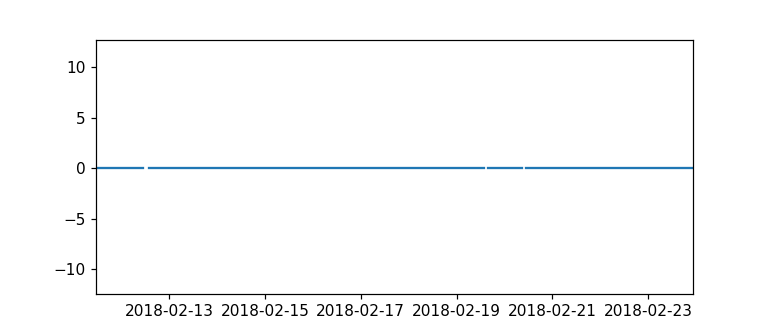

Date range = 1994-07-01 01:00:00 to 2020-12-31 23:00:00
Timestep is 0 days 01:00:00
Value range is 0.0 to 58.42
Average value is 0.06080984871787594
Median value is 0.0




In [13]:
# Import WAILUKU_Rain station 
WAILUKU_Rain = pd.read_csv(os.path.join("..", "..", "Data/Rainfall_data/Yufen_paper", 'WUKH1.csv'))
WAILUKU_Rain['DateTime'] = pd.to_datetime(WAILUKU_Rain['DateTime'], errors='coerce')

# Clean data 
WAILUKU_Rain = WAILUKU_Rain[['DateTime', 'RF_mm']]
WAILUKU_Rain.rename(columns={'DateTime': 'datetime'}, inplace=True)

# Plot data 
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(WAILUKU_Rain['datetime'],WAILUKU_Rain['RF_mm'], '-',label='Rainfall Inches')

TS_Describe_stats(WAILUKU_Rain, 'RF_mm')

### Resample rainfall to 1 hr and combine 

In [66]:
PuuKukuiRain_60min = PuuKukuiRain_set.resample('1H').sum()
PuuKukuiRain_60min['rain_in'] = PuuKukuiRain_60min['rain_in']*25.4             # Convert inches to MM 
PuuKukuiRain_60min.rename(columns={'rain_in': 'PuuKukuiRain_mm'}, inplace=True)   # send it straight to 

KAHAKULOARain_set = KAHAKULOARain.set_index('datetime')
KAHAKULOARain_60min = KAHAKULOARain_set.resample('1H').sum()
KAHAKULOARain_60min.rename(columns={'RF_mm': 'KAHAKULOARain'}, inplace=True)

OGG_Rain_set = OGG_Rain.set_index('datetime')
OGG_Rain_60min = OGG_Rain_set.resample('1H').sum()
OGG_Rain_60min.rename(columns={'RF_mm': 'OGG_Rain'}, inplace=True)

FIELD_28Rain_set = FIELD_28Rain.set_index('datetime')
FIELD_28Rain_60min = FIELD_28Rain_set.resample('1H').sum()
FIELD_28Rain_60min.rename(columns={'RF_mm': 'FIELD_28Rain'}, inplace=True)

KAHAKULOA_MAUKARain_set = KAHAKULOA_MAUKARain.set_index('datetime')
KAHAKULOA_MAUKARain_60min = KAHAKULOA_MAUKARain_set.resample('1H').sum()
KAHAKULOA_MAUKARain.rename(columns={'RF_mm': 'KAHAKULOA_MAUKARain'}, inplace=True)

PUU_KUKIv2_set = PUU_KUKIv2.set_index('datetime')
PUU_KUKIv2_60min = PUU_KUKIv2_set.resample('1H').sum()
PUU_KUKIv2_60min.rename(columns={'RF_mm': 'PUU_KUKIv2'}, inplace=True)

WAILUKU_Rain_set = WAILUKU_Rain.set_index('datetime')
WAILUKU_Rain_60min = WAILUKU_Rain_set.resample('1H').sum()
WAILUKU_Rain_60min.rename(columns={'RF_mm': 'WAILUKU_Rain'}, inplace=True)



<IPython.core.display.Javascript object>


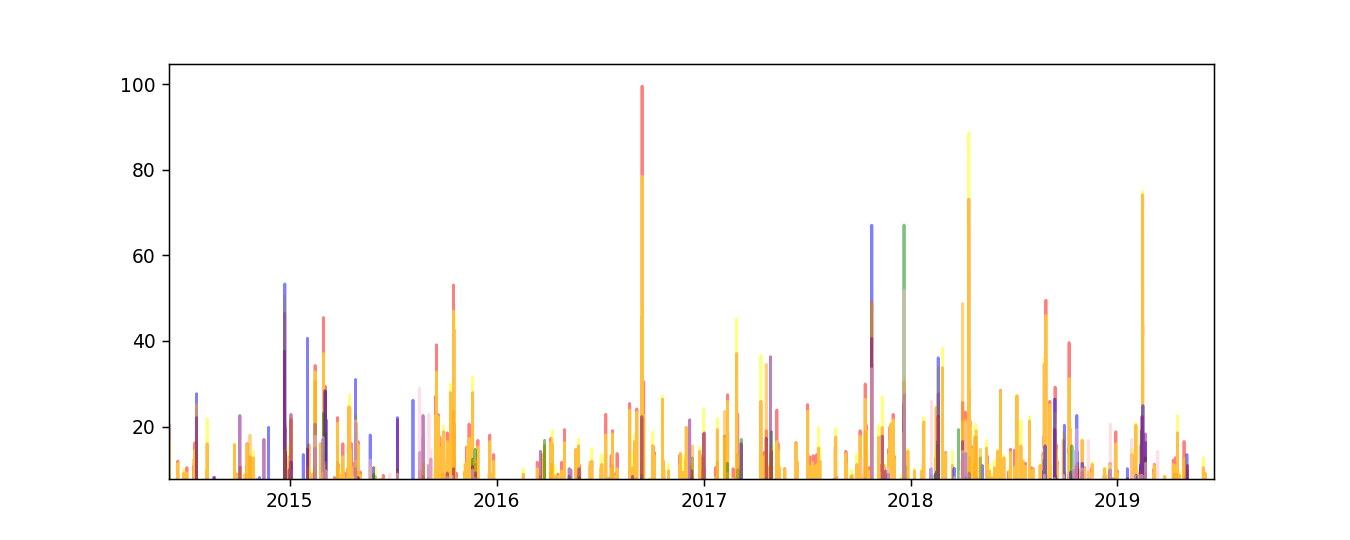

In [84]:
# Make dates as cohesive as possible 
Start_Date = "1995-01-01 00:00:00" 
End_Date = "2020-12-31 23:00:00"

PuuKukuiRain_6060 = PuuKukuiRain_60min[Start_Date:End_Date]
KAHAKULOARain_6060 = KAHAKULOARain_60min[Start_Date:End_Date]
OGG_Rain_6060 = OGG_Rain_60min[Start_Date:End_Date]
FIELD_28Rain_6060 = FIELD_28Rain_60min[Start_Date:End_Date]
KAHAKULOA_MAUKARain_6060 = KAHAKULOA_MAUKARain_60min[Start_Date:End_Date]
PUU_KUKIv2_6060 = PUU_KUKIv2_60min[Start_Date:End_Date]
WAILUKU_Rain_6060 = WAILUKU_Rain_60min[Start_Date:End_Date]

# Merge themm all togehter
m1 = PuuKukuiRain_6060.join(KAHAKULOARain_6060, how='outer')
m2 = m1.join(OGG_Rain_6060)
m3 = m2.join(FIELD_28Rain_6060)
m4 = m3.join(KAHAKULOA_MAUKARain_6060)
m5 = m4.join(PUU_KUKIv2_6060)
Merged_Rainfall_mm = m5.join(WAILUKU_Rain_6060)


# Plot em all 
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(Merged_Rainfall_mm['PuuKukuiRain_mm'], '-', c='r', alpha=0.5, label="PuuKukuiRain_mm")
ax.plot(Merged_Rainfall_mm['PUU_KUKIv2'], '-', c='yellow', alpha=0.5, label="PUU_KUKIv2")
ax.plot(Merged_Rainfall_mm['KAHAKULOARain'], '-', c='b', alpha=0.5, label="KAHAKULOARain")
ax.plot(Merged_Rainfall_mm['OGG_Rain'], '-', c='g', alpha=0.5, label="OGG_Rain")
ax.plot(Merged_Rainfall_mm['FIELD_28Rain'], '-', c='orange', alpha=0.5, label="FIELD_28Rain")
ax.plot(Merged_Rainfall_mm['KAHAKULOA_MAUKARain'], '-', c='purple', alpha=0.5, label="KAHAKULOA_MAUKARain")
ax.plot(Merged_Rainfall_mm['WAILUKU_Rain'], '-', c='pink', alpha=0.5, label="WAILUKU_Rain")

Merged_Rainfall_mm.to_csv("Merged_Rainfall_mm.csv")

In [121]:
Merged_Rainfall_mm



,PuuKukuiRain_mm,KAHAKULOARain,OGG_Rain,FIELD_28Rain,KAHAKULOA_MAUKARain,PUU_KUKIv2,WAILUKU_Rain
datetime,,,,,,,
1995-01-01 00:00:00,NaN,0.000,0.0,NaN,0.0,NaN,0.000
1995-01-01 01:00:00,NaN,0.000,0.0,NaN,0.0,NaN,0.000
1995-01-01 02:00:00,NaN,0.000,0.0,NaN,0.0,NaN,0.000
1995-01-01 03:00:00,NaN,0.000,0.0,NaN,0.0,NaN,0.000
1995-01-01 04:00:00,NaN,0.000,0.0,NaN,0.0,NaN,0.000
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,2.032,1.524,0.0,1.016,NaN,1.016,0.000
2020-12-31 20:00:00,2.540,0.000,0.0,0.000,NaN,1.778,1.016
2020-12-31 21:00:00,3.556,0.000,0.0,0.254,NaN,3.556,0.508
